In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [84]:
df = pd.read_csv('Cars.csv').iloc[:,1:]
sp = df.pop('selling_price')
df.insert(0,'Selling_Price', sp)
km = df.pop('km_driven')
df.insert(1,'km_driven', km)
df['Selling_Price'] = np.log10(df['Selling_Price']) #Log transform for a better fit
df['km_driven'] = np.log10(df['km_driven']) 
df

,Selling_Price,km_driven,owner,Age,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
0,4.778151,4.845098,0,16,0,1,0,1,1
1,5.130334,4.698970,0,16,0,1,0,1,1
2,5.778151,5.000000,0,11,1,0,0,1,1
3,5.397940,4.662758,0,6,0,1,0,1,1
4,5.653213,5.149219,1,9,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
4335,5.612783,4.903090,1,9,1,0,0,1,1
4336,5.612783,4.903090,1,9,1,0,0,1,1
4337,5.041393,4.919078,1,14,0,1,0,1,1
4338,5.937016,4.954243,0,7,1,0,0,1,1


In [85]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:],df.iloc[:,0], test_size = .2, random_state = 0)

In [86]:
X_train

,owner,Age,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
159,0,8,1,0,0,1,1
4334,0,11,1,0,0,1,1
1657,0,17,0,1,0,1,1
2188,0,8,0,1,0,0,1
581,0,7,0,1,1,0,1
...,...,...,...,...,...,...,...
1033,0,10,1,0,1,0,0
3264,0,11,1,0,0,1,1
1653,0,7,0,1,0,1,1
2607,0,8,1,0,0,1,1


In [88]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
linreg.coef_

array([-0.02548195, -0.05056274,  0.25538213,  0.04105674, -0.12529047,
       -0.20270947, -0.3399354 ])

In [6]:
mean_squared_error(y_test,y_pred) #Extremely high bias

0.04285275253831128

In [7]:
r2_score(y_test,y_pred) #Linear Regression is a poor fit 

0.6888511024093908

In [8]:
mean_squared_error(y_train,linreg.predict(X_train))

0.0414267340083811

In [9]:
r2_score(y_train,linreg.predict(X_train))

0.6850973380154

<AxesSubplot:xlabel='Age', ylabel='Selling_Price'>

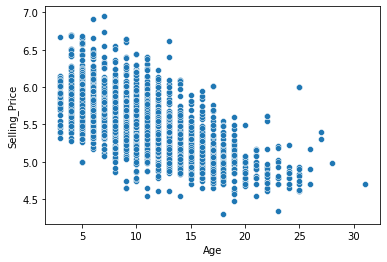

In [10]:
sns.scatterplot(x = df['Age'], y = df['Selling_Price'])

<AxesSubplot:xlabel='km_driven', ylabel='Selling_Price'>

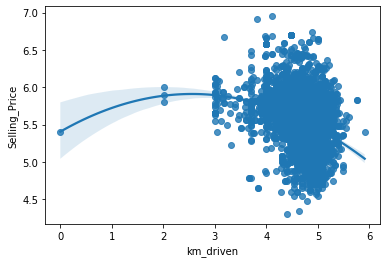

In [11]:
sns.regplot(x = df['km_driven'], y = df['Selling_Price'], order = 2)

In [61]:
X = np.array(df['Age']).reshape(-1, 1)
p2 = PolynomialFeatures(degree = 3,include_bias = False)
t = p2.fit_transform(X)
t

array([[  16.,  256., 4096.],
       [  16.,  256., 4096.],
       [  11.,  121., 1331.],
       ...,
       [  14.,  196., 2744.],
       [   7.,   49.,  343.],
       [   7.,   49.,  343.]])

In [79]:
df = df.drop(columns = ['km^2','km^3','Age^2'])

In [66]:
km = pd.DataFrame(t, columns = ['Age','Age^2','Age^3'])

In [69]:
df = pd.concat([df,km],axis = 1)

In [80]:
df

,Selling_Price,owner,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual,km,Age
0,4.778151,0,0,1,0,1,1,4.845098,16.0
1,5.130334,0,0,1,0,1,1,4.698970,16.0
2,5.778151,0,1,0,0,1,1,5.000000,11.0
3,5.397940,0,0,1,0,1,1,4.662758,6.0
4,5.653213,1,1,0,0,1,1,5.149219,9.0
...,...,...,...,...,...,...,...,...,...
4335,5.612783,1,1,0,0,1,1,4.903090,9.0
4336,5.612783,1,1,0,0,1,1,4.903090,9.0
4337,5.041393,1,0,1,0,1,1,4.919078,14.0
4338,5.937016,0,1,0,0,1,1,4.954243,7.0


In [81]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0], test_size = .2, random_state = 0)

In [82]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
linreg.coef_

array([-0.02475145,  0.25811222,  0.03574424, -0.12558972, -0.20014189,
       -0.3388142 , -0.03140143, -0.04917878])

In [32]:
mean_squared_error(y_test,y_pred)

0.04280011342914368

In [33]:
r2_score(y_test,y_pred)

0.6892333089146325

In [34]:
mean_squared_error(y_train,linreg.predict(X_train))

0.041398050504198834

In [35]:
r2_score(y_train,linreg.predict(X_train))

0.6853153738330489

In [73]:
print(mean_squared_error(y_test,y_pred)) #Results of degree 2 
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_train,linreg.predict(X_train)))
print(r2_score(y_train,linreg.predict(X_train)))

0.0414257867232741
0.6992121367408812
0.04086411205103693
0.6893740727447855


In [78]:
print(mean_squared_error(y_test,y_pred)) #Results of degree 3
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_train,linreg.predict(X_train)))
print(r2_score(y_train,linreg.predict(X_train)))

0.04182617781271053
0.6963049431837843
0.041073266594166415
0.6877841978976802


In [83]:
print(mean_squared_error(y_test,y_pred)) #Results of degree 1
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_train,linreg.predict(X_train)))
print(r2_score(y_train,linreg.predict(X_train))) #Adding Polynomial Terms does not make a huge difference

0.04285275253831131
0.6888511024093906
0.04142673400838111
0.6850973380153998
